# Demo: scanreader

Examples of scanreader usage from a [jupyter notebook](https://jupyter.org/) and from the commmand line.

## Libraries:

- [napari](https://napari.org/stable/) for displaying images
- [zarr](https://zarr.readthedocs.io/en/stable/) and [dask](https://www.dask.org/) for lazy-loading operations

In [1]:
### Imports
from pathlib import Path
from tifffile import ZarrTiffStore, ZarrStore
import dask
import zarr
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../scanreader")
import scanreader

%load_ext autoreload
%autoreload 2

## Data path setup

In [2]:
datapath = Path().home() / 'caiman_data'
data = scanreader.read_scan(datapath)

In [7]:
z_plane_1 = data[:]
z_plane_1

dask.array<concatenate, shape=(1730, 30, 600, 576), dtype=int16, chunksize=(1730, 30, 600, 144), chunktype=numpy.ndarray>

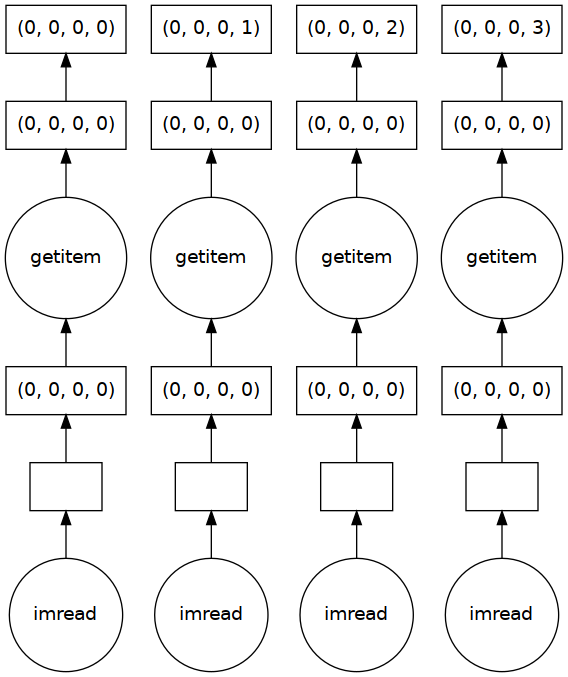

In [10]:
z_plane_1.visualize()

In [11]:
store = zarr.DirectoryStore('data/array.zarr')
z = zarr.empty_like(z_plane_1)
z

<zarr.core.Array (1730, 30, 600, 576) int16>

In [17]:
z_plane_1[0,0,:,:]

dask.array<getitem, shape=(600, 576), dtype=int16, chunksize=(600, 144), chunktype=numpy.ndarray>

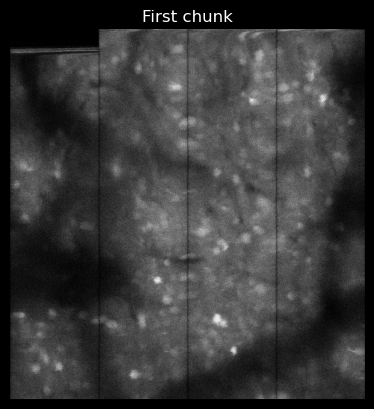

In [19]:
fig, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(z_plane_1[0,0,:,:], cmap='gray')
# ax1.imshow(z_plane_1[0,0,:,1], cmap='gray')
# ax2.imshow(z_plane_1[0,0,:,2], cmap='gray')
# ax3.imshow(z_plane_1[0,0,:,3], cmap='gray')

# Subplot headings
ax0.set_title('First chunk')
# ax1.set_title('Second chunk')
# ax2.set_title('Thurd chunk')
# ax3.set_title('Fourth chunk')

# Don't display axes
ax0.axis('off')
# ax1.axis('off')
# ax2.axis('off')
# ax3.axis('off')

# Display images
plt.show(fig)